This is the cell that we would import all the libraries we will be using.

Pandas is for functions involving the importation and preparation of our data set.

Matplotlib and Seaborn are data visualisation libraries which we will implement along the process of our project.

Sklearn is a mathematical library which we will use for scaling as well as importing the models that we will use in our project.



In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import scale
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score




Reading the breast cancer data set into the jupyter notebook using pandas read csv function.


In [17]:
bcancer= pd.read_csv("cancerdata.csv")
bcancer.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,4.454847,2.386095,2.295170,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268,0
1,4.454847,4.637212,4.603958,5.742196,7.896027,8.074609,3.582104,3.344739,3.199268,0
2,2.824082,2.386095,2.295170,2.530536,2.723036,3.025014,3.582104,2.591299,3.199268,0
3,5.270230,7.638702,7.682342,2.530536,3.757634,4.287413,3.582104,7.111938,3.199268,0
4,3.639465,2.386095,2.295170,4.136366,2.723036,2.393815,3.582104,2.591299,3.199268,0


Plotting the initial raw data set before scaling using seaborn to see the general view of data available.


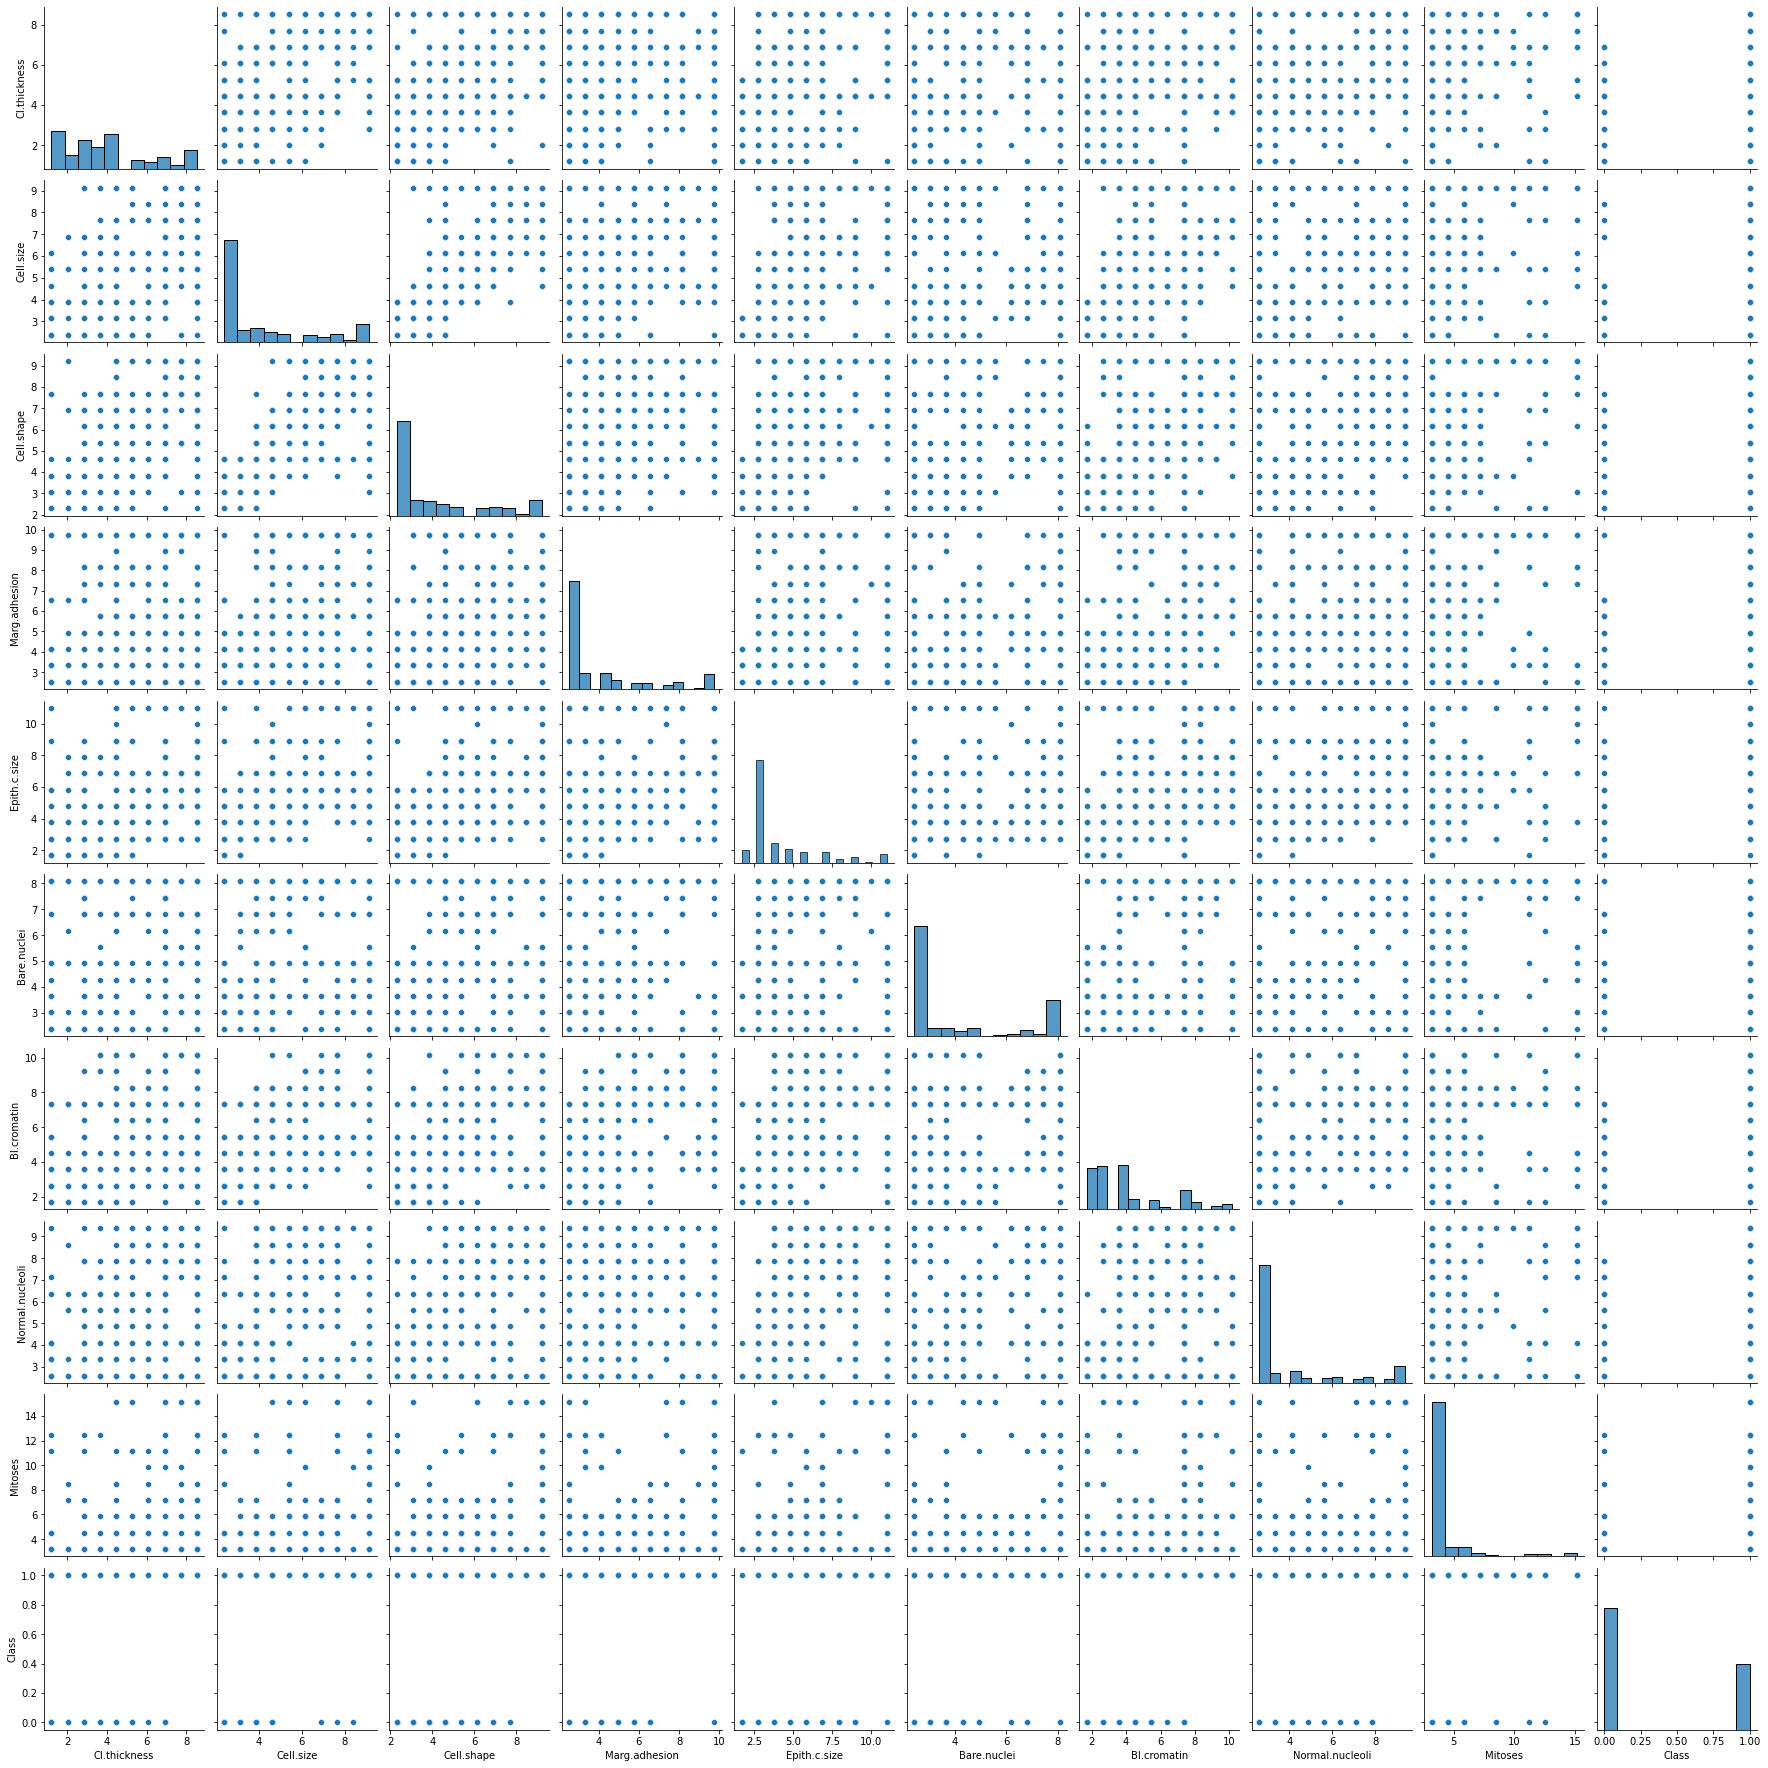

In [18]:
sns.pairplot(bcancer)


All the columns have continious Values except the target column(Class) which is only has valyes of 0 and 1. Continious values are difficult for naive bayes modelling so we will scale these values to make it easier for the model to deal with. 

Lets get a more in depth look at the columns using seaborn to plot histograms.


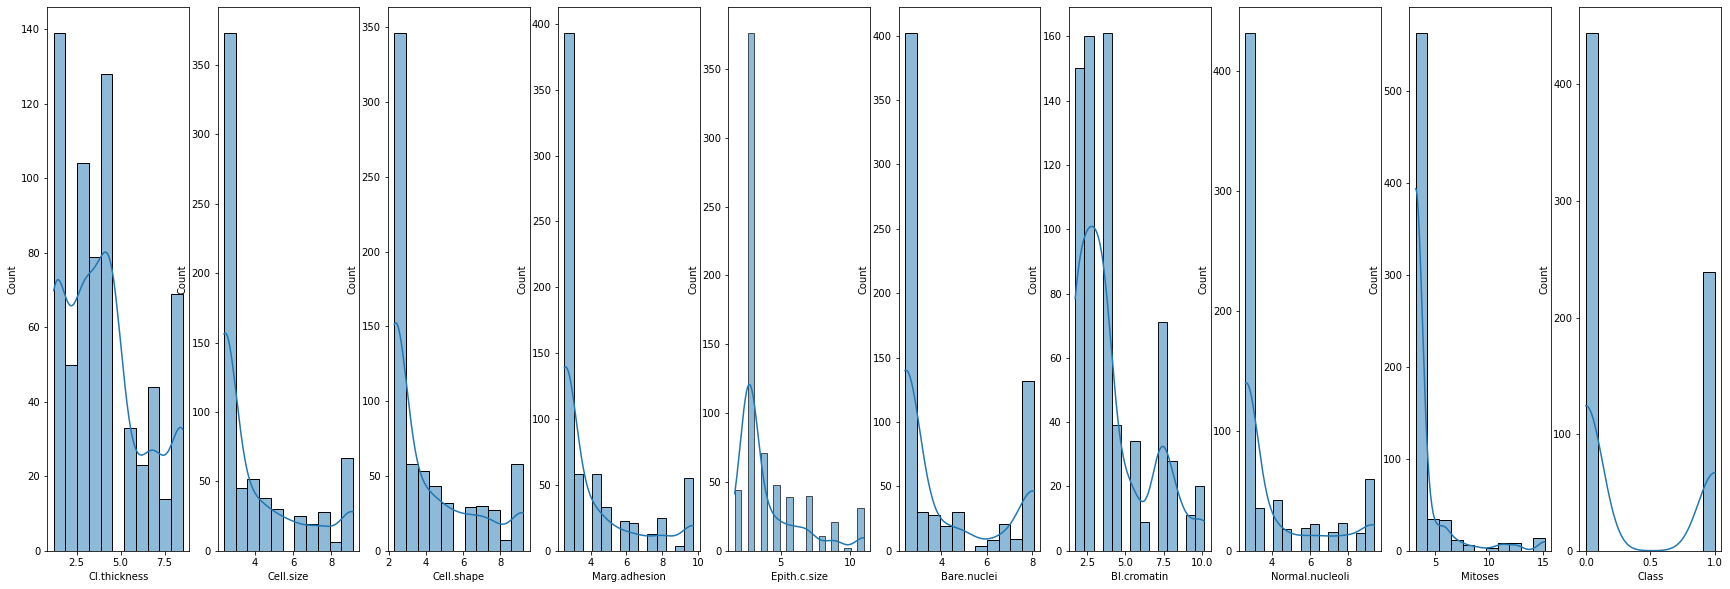

In [19]:
fig,axes= plt.subplots(1,10, figsize=(30,10))
i=-1;
for col in bcancer.columns:
     i+=1;
     sns.histplot(bcancer,ax=axes[i], x=col, kde=True)



Most of our data is distributed as a numerical measurement. We will implement the Guassian Naive Bayes classification method

Checking the data types of features in the data set. This is a precausion to make sure all our feature colunmns are of the same data type.


In [8]:
bcancer.dtypes

Cl.thickness       float64
Cell.size          float64
Cell.shape         float64
Marg.adhesion      float64
Epith.c.size       float64
Bare.nuclei        float64
Bl.cromatin        float64
Normal.nucleoli    float64
Mitoses            float64
Class                int64
dtype: object

Splitting our data set into target variable and features. This will be used to fit our model so it can differentiate between the depenendent column and the prediction columns


In [136]:
X = bcancer.iloc[:,:-1]
Y = bcancer.iloc[:,-1]

X

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,4.454847,2.386095,2.295170,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268
1,4.454847,4.637212,4.603958,5.742196,7.896027,8.074609,3.582104,3.344739,3.199268
2,2.824082,2.386095,2.295170,2.530536,2.723036,3.025014,3.582104,2.591299,3.199268
3,5.270230,7.638702,7.682342,2.530536,3.757634,4.287413,3.582104,7.111938,3.199268
4,3.639465,2.386095,2.295170,4.136366,2.723036,2.393815,3.582104,2.591299,3.199268
...,...,...,...,...,...,...,...,...,...
678,2.824082,2.386095,2.295170,2.530536,3.757634,3.025014,1.704320,2.591299,3.199268
679,2.008699,2.386095,2.295170,2.530536,2.723036,2.393815,1.704320,2.591299,3.199268
680,4.454847,9.139446,9.221535,4.136366,7.896027,3.656214,8.276563,9.372257,4.526695
681,3.639465,7.638702,6.143150,4.939281,3.757634,4.287413,10.154346,6.358498,3.199268


Naive bayes accuracy is affected highly by highly correlated values. Plotting a cluster map below to check the correlation of features and taking next steps based on the resukts 

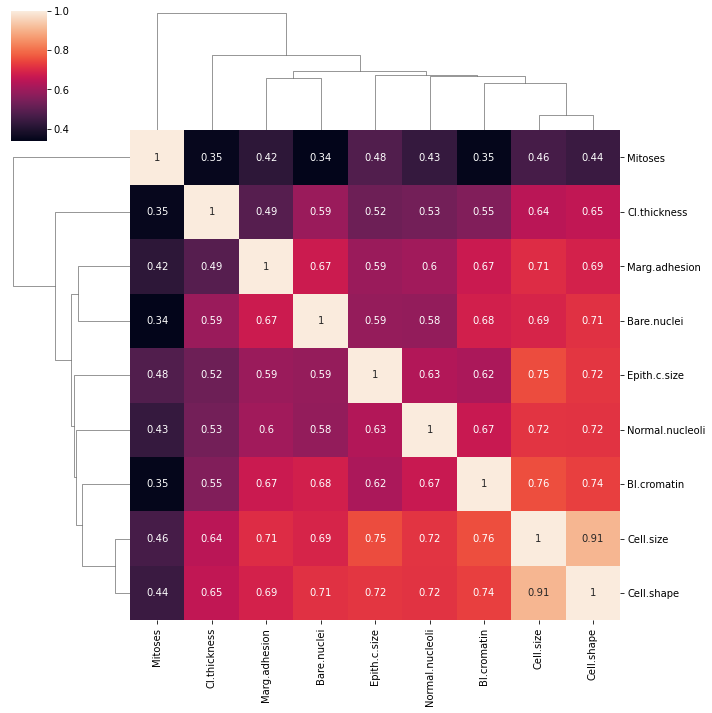

In [137]:
Xcorr = X.corr()
sns.clustermap(Xcorr, xticklabels=Xcorr.columns, yticklabels=Xcorr.columns, annot=True)


Cell size and Cell shape have a very high correlation value. We will create our model with both these features added, and trhen create another one with only one of them to check if our model improves with or without them

### Scaling

Scaling the feature columns using sklearns scale library function before fitting it in the guassian model. This improves the understanding of the data by the model and increases the degree at which it understands the problem. We also used this method of scaling to break the data down from a table format to a dimensional array format.


In [138]:
X_scaled = sklearn.preprocessing.scale(X)

X_scaled

array([[ 0.19790469, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       [ 0.19790469,  0.27725185,  0.26278299, ..., -0.18182716,
        -0.28510482, -0.34839971],
       [-0.51164337, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       ...,
       [ 0.19790469,  2.23617957,  2.2718962 , ...,  1.86073779,
         2.33747554,  0.22916583],
       [-0.15686934,  1.58320366,  0.93248739, ...,  2.67776377,
         1.02618536, -0.34839971],
       [-0.15686934,  1.58320366,  1.6021918 , ...,  2.67776377,
         0.37054027, -0.34839971]])

Splitting our data into a train/test split of 75/25. This is to accomodate for a possible class imbalance so our model can learn as much as possiblew ithout overfitting.

In [180]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y.values, random_state=10)


x_train

array([[ 1.26222679,  0.27725185,  0.26278299, ..., -0.59034015,
         0.69836281,  0.22916583],
       [ 1.26222679,  2.23617957,  2.2718962 , ..., -0.18182716,
         2.33747554,  4.8496901 ],
       [-0.15686934, -0.70221201, -0.40692142, ..., -0.18182716,
        -0.61292736, -0.34839971],
       ...,
       [ 0.19790469, -0.0492361 , -0.74177362, ..., -0.99885314,
        -0.61292736, -0.34839971],
       [-0.51164337, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       [ 0.90745276, -0.37572406,  0.26278299, ..., -0.18182716,
         0.04271773, -0.34839971]])

## MODELLING

### NAIVE BAYES MODELLING

Naive Bayes is an spplication of Bayes rule,the probability of events based on prior knowledge of conditions or events P(A|B) = P(B|A)P(A)/P(B), implemented in carrying out classifications of data points. The applications mission is to assign each data point to a class i.e class Xi to class Ck. P(Ck|Xi)= P(Xi|Ck)P(Ck)(because P(Xi) is fixed).

Naive Bayes assumes in a vector with multiple features every feature Xi is independent of every other feature X1,X,X3,X4,...,Xi. This explains the correlstion check we will do in this model to confirm each features has an exceptable correlation with other features

In this Naive bayes application a distribution for the data is defined in attempts to classify before it actually classifies it. This distribution is based off the actual distribution of the data, In this situation we define a Gussian Distribution which means each flow of data for a class is assumed to be a guassian distribution.

This is used when using naive bayes on continious featuress which has been deemed to have a guassian or normal distribution

In [181]:
GNB= GaussianNB()
GNB.fit(x_train, y_train)

GaussianNB()

In [200]:
y_pred= GNB.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       109
           1       0.95      0.98      0.97        62

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



The naive bayes model achieves an accuracy of 0.98 in predicting the class of breast cancer

Attempts to improve the accuracy by dropping the cell shape feature

In [127]:
Z = bcancer.iloc[:,:-1]
Z.drop(["Cell.size"], axis=1)


,Cl.thickness,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,4.454847,2.295170,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268
1,4.454847,4.603958,5.742196,7.896027,8.074609,3.582104,3.344739,3.199268
2,2.824082,2.295170,2.530536,2.723036,3.025014,3.582104,2.591299,3.199268
3,5.270230,7.682342,2.530536,3.757634,4.287413,3.582104,7.111938,3.199268
4,3.639465,2.295170,4.136366,2.723036,2.393815,3.582104,2.591299,3.199268
...,...,...,...,...,...,...,...,...
678,2.824082,2.295170,2.530536,3.757634,3.025014,1.704320,2.591299,3.199268
679,2.008699,2.295170,2.530536,2.723036,2.393815,1.704320,2.591299,3.199268
680,4.454847,9.221535,4.136366,7.896027,3.656214,8.276563,9.372257,4.526695
681,3.639465,6.143150,4.939281,3.757634,4.287413,10.154346,6.358498,3.199268


In [146]:
Z_scaled= sklearn.preprocessing.scale(Z)
z_train,z_test,y_ztrain,y_ztest = train_test_split(Z_scaled,Y.values, random_state=11)


In [147]:
GNB= GaussianNB()
GNB.fit(z_train, y_ztrain)

GaussianNB()

Usually highly correlated features negatively affect the naive bayes model, but in certain cases when the correlated features usually when data is scarce, it performs suprisingly well, this will be explained in detail at the end of the project.

In [148]:
y2_pred= GNB.predict(z_test)
print(classification_report(y_ztest,y2_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       103
           1       0.96      0.99      0.97        68

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



### LOGISTIC REGRESSION

Logistic regression is a classification model that came about out of the drawback of the linear regression model being unable to make predictions on yes or no values(Bernoulli Distribution). 
Logistic regression replaces the line of best fit a linear regression model would plot with a sigmoid which is an S shaped curve.

The logistic regression ia able to create this sigmoid that can be used to predict values based off the formula logit(Px) = log(Px/1-Px)=B0 + B1X, the logit function. This function is purposed to model the probability of sucess(The dominant class) for the covariate value X=x.

Logistic regression does not require the standardisation of data, hence we would work with pre scaled data for the logistic regression model.

Scaling of data in logistic regression is not a necessary activity according to multiple schools. Scaling affects the magnitude of input data and this in turn affects the gradient which would greatly affect a line of best fit for a linear regression, but for logistic regression which implements a sigmoid line, the scaling or normalization would not have an effect.

In [186]:
x_ltrain,x_ltest,y_ltrain,y_ltest = train_test_split(X.values,Y.values, random_state=10)




In [205]:
logreg= LogisticRegression(random_state=0).fit(x_ltrain, y_train)

In [206]:
y_lpred= logreg.predict(x_ltest)

In [209]:
print(classification_report(y_ltest,y_lpred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       109
           1       0.97      0.97      0.97        62

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Plotting the logistic regression sigmoind curve of cell size against the target variable to visualise how accurately the curve meets the points using the seaborn library.

<AxesSubplot:xlabel='Cell.shape', ylabel='Class'>

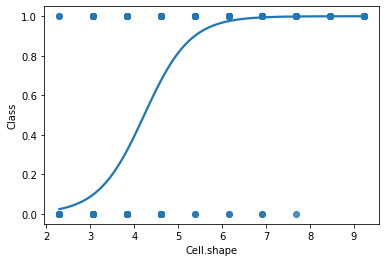

In [191]:
c = bcancer['Cell.shape']
d = bcancer['Class']

sns.regplot(x=c, y=d, data=bcancer, logistic=True, ci=None)

### Evaluation and Scoring

### CONFUSION MATRIX

Classification models can be evaluated using a confusion matrix. A confusion matrix uses the labels supplied in the target column and the prediction made using the model to proudce four values; The number of True positives, the number of false positives, the number of true negatives and the number of false negatives. 

True Positive: The number of Yes(1) values correctly predicted by the model.
False positive: The number of Yes(1) values incorrectly predicted by the model.
True Negative: The number of No(0) values correctly predicted by the model.
False Negative: The number of No(0) values incorrectly predicted by the model

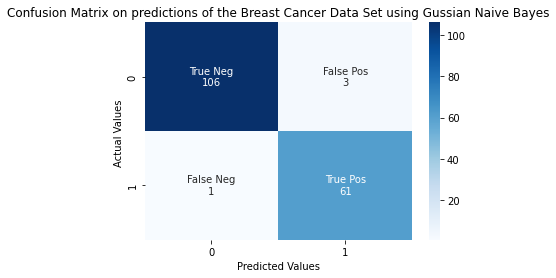

In [212]:
cfmatrix = confusion_matrix(y_test,y_pred)

box = ['True Neg','False Pos','False Neg','True Pos']

values = ["{0:0.0f}".format(value) for value in
                cfmatrix.flatten()]

box = [f"{s}\n{t}" for s,t in
          zip(box,values)]
box = np.asarray(box).reshape(2,2)



ax = sns.heatmap(cfmatrix, annot=box,fmt='', cmap='Blues')
ax.set_title('Confusion Matrix on predictions of the Breast Cancer Data Set using Gussian Naive Bayes');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');



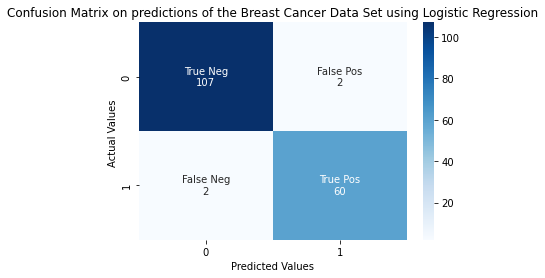

In [211]:
cfmatrix = confusion_matrix(y_ltest,y_lpred)

box = ['True Neg','False Pos','False Neg','True Pos']

values = ["{0:0.0f}".format(value) for value in
                cfmatrix.flatten()]

box = [f"{s}\n{t}" for s,t in
          zip(box,values)]
box = np.asarray(box).reshape(2,2)



ax = sns.heatmap(cfmatrix, annot=box,fmt='', cmap='Blues')
ax.set_title('Confusion Matrix on predictions of the Breast Cancer Data Set using Logistic Regression');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');


Minimising false negativates(Recall) is our aim when evaluating these metrics. Based on both confusion matrixes we can see that guassian naive bayes has a lower false negative value which we are biased towards. Therefore by our metric the guassian naive bayes model fits our problem statement more appropriately.

Minimising false negatives enables us to rarely predict a patient as not having cancer when they in fact have it, this is a good trade off with falsely diagnosing a patient with cancer(scares).

The classification report calculates metrics which our model generates. These metrics are used to measure the performance of our models. These metrics are defined below;

Precision: This is the ratio of true positives to the sum of true positives and false positives, this determiens the percentage of our predictions that were correct for a particular class.

Recall: This is the ratio of true positives to the sum of true positives and false negatives, this is the likelihood of our model to identify positive values of a given class.

Accuracy: This is the ratio of the sum of true positives and true negatives to the sum of all predictions, it determines how accurately your model makes predictions.

F1-Score: The F1-Score is a result of the harmonic mean of a models precision and recall, used for comparing models not as a measure of accuracy.

Naive Bayes Model Report

In [201]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       109
           1       0.95      0.98      0.97        62

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



Logistic Regression Model Report

In [208]:
print(classification_report(y_ltest,y_lpred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       109
           1       0.97      0.97      0.97        62

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



The F1-Scores of our models are too close to make a decision solely based on those values. Looking at our problem statement, our aim is to accurately identify the class of cancer as benign or malignant(0 or 1). 

The 1 value is of greater importance in our prediction for example a real life scenario with a false negative value would have life or death consequences. Reducing our false negatives ties to our recall metric (TP/TP+FN). The closer our ratio is to 1.0 for the 1 class is the better, hence the naive bayes theorem is  better fit for our problem. 

### Validation

Validation of models is an important step. These processes determine if our model is truly performing well i.e would perform similarly on data is has not been exposed to, or is simply just overfitting our training data. There are multiple techniques for this process e.g K-Fold Cross-Validation,Leave-one-out Cross validation, Train/Validate/Test Split are some of them. K fold cross validation will be implemented for the validation of the models above.


### K-fold Cross Validation

K fold cross validation is the process of splitting our train/test split into k folds, the model is tested on the number of folds generated and the mean of the accuracy of these values are calculated. The result is the validation score of the model 

Guassian Naive Bayes K-fold Cross Validation

We will use a k value of 10 and run the cross validation on both our

In [222]:
cval= cross_val_score(GNB, x_train, y_train, cv=10, scoring= 'accuracy')

cval

array([0.98076923, 0.96153846, 1.        , 0.96078431, 1.        ,
       0.90196078, 0.94117647, 0.94117647, 0.96078431, 0.92156863])

In [219]:
cval.mean()

0.956975867269985

Cross Validation score of our Guassian is 0.96.

Logistic Regression K-fold Cross Validation

In [223]:
cvalL= cross_val_score(logreg, x_ltrain, y_ltrain, cv=10, scoring= 'accuracy')

cvalL

array([0.96153846, 0.94230769, 0.96078431, 0.96078431, 1.        ,
       0.96078431, 0.92156863, 0.98039216, 0.98039216, 0.94117647])

In [224]:
cvalL.mean()

0.9609728506787331

Cross Validation score of our Log Reg is 0.96.